# **Redes Neuronales - Data Science**
### Pigini Jeremias Gabriel

**A continuacion analizaremos un dataset con datos extraidos de la pagina de venta de vehiculos CarDekho.com, que seria extraido de 'https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho'.**

Para este trabajo utilizamos la libreria de tensorflow con la API de keras, para aplicar una regrecion lineal sobre los presion del dataset conrrespondiente. El mismo esta dividido en 4 secmentos, los cuales se trabajaron con 3 de ellos ya que el 4to no poseia mucha informacion.

## **Detalles de los datos del dataset**

Este dataset contiene informacion de vehiculos vendidos en la pagina de CarDekho.

1.   name = Nombre y modelo del vehiculo
2.   year = Año de fabricacion
3.   selling_price = Precio de venta del vehiculo
4.   km_drive = Cantidad de km del vehiculo
5.   fuel = Combustible que usa el vehiculo
6.   seller_type = Tipo de vendedor
7.   transmission = Tipo de transmicion del vehiculo
8.   owner = Cantidad de titulares que tuvo el vehiculo
9.   mileage = Consumo del vehiculo
10.  engine = Cilindrado del motor
11.  max_power = Potencia del vehiculo
12.  torque = Momento de nayor fuerza del motor
13.  seats = Cantidad de asientos

## **Librerias a instalas para este proyecto**

In [2]:
#!pip install numpy
#!pip install scikit-learn
#!pip install tensorflow
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib

In [3]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Llamamos a los 2 primeros datasets

In [4]:
# Especifica la ruta al archivo CSV en Google Drive
df = pd.read_csv('/content/drive/MyDrive/Curso_icaros/Sprint3/Sprint3/CarDekho/Car_train.csv')

In [5]:
df2 = pd.read_csv('/content/drive/MyDrive/Curso_icaros/Sprint3/Sprint3/CarDekho/car details v4.csv')

Analizamos sus contenidos y los preparamos para realizar la red neuronal

In [6]:
df2

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


Se trabaja sobre df2 para que las colimnas coinsidan con las de df.

In [7]:
df2['name'] = df2['Make'] + ' ' + df2['Model']

In [8]:
df2.rename(columns={'Price': 'selling_price'}, inplace=True)

In [9]:
df2.rename(columns={'Kilometer': 'km_driven'}, inplace=True)

In [10]:
df2.rename(columns={'Year': 'year'}, inplace=True)

In [11]:
df2 = df2[['name', 'year', 'selling_price','km_driven']]

In [12]:
df2.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
dtype: int64

In [13]:
df2.describe()

,year,selling_price,km_driven
count,2059.000000,2.059000e+03,2.059000e+03
mean,2016.425449,1.702992e+06,5.422471e+04
std,3.363564,2.419881e+06,5.736172e+04
min,1988.000000,4.900000e+04,0.000000e+00
25%,2014.000000,4.849990e+05,2.900000e+04
50%,2017.000000,8.250000e+05,5.000000e+04
75%,2019.000000,1.925000e+06,7.200000e+04
max,2022.000000,3.500000e+07,2.000000e+06


In [14]:
#Se eliminan todas las variables anteriores a 2005 para quetar outliers
df2 = df2[df2['year'] >= 2005]

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2054 entries, 0 to 2058
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2054 non-null   object
 1   year           2054 non-null   int64 
 2   selling_price  2054 non-null   int64 
 3   km_driven      2054 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 80.2+ KB


In [16]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [17]:
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [19]:
df.nunique()

name             2058
year               29
selling_price     677
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           393
engine            121
max_power         322
torque            441
seats               9
dtype: int64

In [20]:
#Se eliminan todas las variables anteriores a 2005 para quetar outliers
df = df[df['year'] >= 2005]

In [21]:
df.describe()

,year,selling_price,km_driven,seats
count,7909.000000,7.909000e+03,7.909000e+03,7741.000000
mean,2014.145530,6.532982e+05,6.914448e+04,5.428110
std,3.500081,8.121305e+05,5.655494e+04,0.954606
min,2005.000000,3.500000e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.520000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [22]:
df = df.drop(170, axis=0)

In [23]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [24]:
df = pd.concat([df, df2], ignore_index=True)

In [25]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,Mahindra XUV500 W8 [2015-2017],2016,850000,90300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9958,Hyundai Eon D-Lite +,2014,275000,83000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9959,Ford Figo Duratec Petrol ZXI 1.2,2013,240000,73000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9960,BMW 5-Series 520d Luxury Line [2017-2019],2018,4290000,60474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Se crean unos graficos para tener una idea de distribucion de los datos en selling_price, ya que van a ser los datos principales a analizar y se querran predecir en el futuro

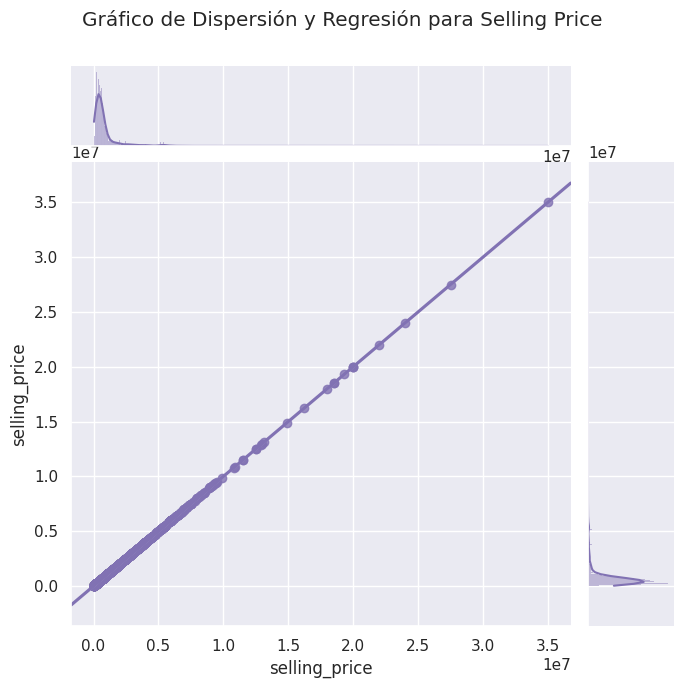

In [26]:
import seaborn as sns
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="selling_price", y="selling_price", data=df, kind="reg", truncate=False, color="m", height=7)

g.fig.suptitle("Gráfico de Dispersión y Regresión para Selling Price")
g.fig.subplots_adjust(top=0.9)

Se realiza un boxplot para divisar los outliers, al observars que mucha de la informacion es vista como outliers se buscara normalizar en el modelo de prediccion

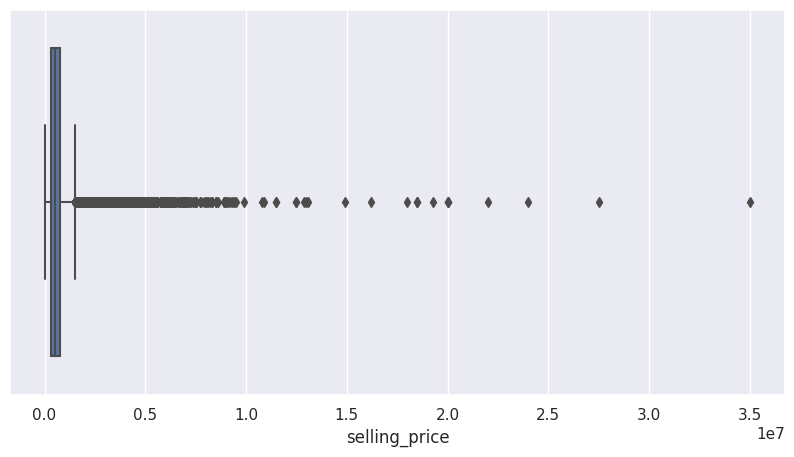

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
plt.ylim(0,600)
sns.boxplot(x='selling_price',data=df)
plt.show()

In [28]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9957,Mahindra XUV500 W8 [2015-2017],2016,850000,90300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9958,Hyundai Eon D-Lite +,2014,275000,83000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9959,Ford Figo Duratec Petrol ZXI 1.2,2013,240000,73000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9960,BMW 5-Series 520d Luxury Line [2017-2019],2018,4290000,60474,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Se realiza el modelo de prediccion**
Utilizamos la libreria de Tensorflow con la API de keras y usamos ADAM como optimizador.

In [29]:
#vamos a utilizar solo las columnas necesarias para la predicción
df = df[['name', 'year', 'selling_price','km_driven']]

# Codifica las variables categóricas en números
label_encoders = {}
for column in ['name','year','km_driven']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Normaliza los valores
scaler = StandardScaler()
df['selling_price'] = scaler.fit_transform(df['selling_price'].values.reshape(-1, 1))

# Divide los datos en conjuntos de entrenamiento y prueba
X = df[['name','year','km_driven']].values
y = df['selling_price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializa el escalador
scaler = StandardScaler()

# Ajusta el escalador a los datos de entrenamiento y transforma los datos
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define el modelo de red neuronal
model = keras.Sequential([
    keras.layers.Input(shape=(3,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1)
])

# Compila el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrena el modelo
model.fit(X_train, y_train, epochs=2000, batch_size=64, validation_split=0.2)

# Evalúa el modelo en el conjunto de prueba
loss = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')

# Hacer predicciones
predicciones = model.predict(X_test)

<ipython-input-29-276bf415299b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
<ipython-input-29-276bf415299b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = le.fit_transform(df[column])
<ipython-input-29-276bf415299b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

Epoch 1/2000
100/100 [==============================] - 2s 5ms/step - loss: 0.8906 - val_loss: 0.8432
Epoch 2/2000
100/100 [==============================] - 0s 3ms/step - loss: 0.8025 - val_loss: 0.7925
Epoch 3/2000
100/100 [==============================] - 0s 3ms/step - loss: 0.7846 - val_loss: 0.7958
Epoch 4/2000
100/100 [==============================] - 0s 3ms/step - loss: 0.7651 - val_loss: 0.7518
Epoch 5/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.7577 - val_loss: 0.7378
Epoch 6/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.7479 - val_loss: 0.7129
Epoch 7/2000
100/100 [==============================] - 0s 3ms/step - loss: 0.7348 - val_loss: 0.6914
Epoch 8/2000
100/100 [==============================] - 0s 3ms/step - loss: 0.7206 - val_loss: 0.6886
Epoch 9/2000
100/100 [==============================] - 0s 3ms/step - loss: 0.7153 - val_loss: 0.6767
Epoch 10/2000
100/100 [==============================] - 0s 2ms/step - loss: 0.714

In [30]:
from sklearn.metrics import mean_squared_error

# Calcula el RMSE
rmse = np.sqrt(mean_squared_error(y_test, predicciones))
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')

Raíz del Error Cuadrático Medio (RMSE): 0.7412331007365754


# **Se carga el tercer dataset para probar el modelo**

In [31]:
df_test2 = pd.read_csv('/content/drive/MyDrive/Curso_icaros/Sprint3/Sprint3/CarDekho/CAR DETAILS FROM CAR DEKHO.csv')

In [32]:
df_test2

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [37]:
df_test2.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [38]:
df_test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [39]:
df_test2.nunique()

name             1491
year               27
selling_price     445
km_driven         770
fuel                5
seller_type         3
transmission        2
owner               5
dtype: int64

In [40]:
#Se eliminas todas las filas anteriores al año 2005, ya que fue un paso a tomar anteriormente para evitar unos outliers en df
df_test2 = df_test2[df_test2['year'] >= 2005]

In [41]:
df_test2.describe()

,year,selling_price,km_driven
count,4193.000000,4.193000e+03,4193.000000
mean,2013.493680,5.178619e+05,65675.658001
std,3.661229,5.833777e+05,46864.562451
min,2005.000000,2.000000e+04,1.000000
25%,2011.000000,2.200000e+05,34000.000000
50%,2014.000000,3.750000e+05,60000.000000
75%,2017.000000,6.100000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


# **Se utiliza el modelo ya entrenado para realizar una nueva prediccion y verificar la efectividad del modelo creado**

In [42]:
# Selecciona las columnas necesarias para la predicción en df_test2
df_test2 = df_test2[['name', 'year', 'selling_price', 'km_driven']]

# Codifica las variables categóricas en números
label_encoders = {}
for column in ['name', 'year', 'km_driven']:
    le = LabelEncoder()
    df_test2[column] = le.fit_transform(df_test2[column])
    label_encoders[column] = le

# Normaliza los valores
scaler = StandardScaler()
df_test2['selling_price'] = scaler.fit_transform(df_test2['selling_price'].values.reshape(-1, 1))

# Selecciona las características en df_test2 para hacer la predicción
X2 = df_test2[['name', 'year', 'km_driven']].values
y2 = df_test2['selling_price'].values

# Realiza la predicción
predicciones = model.predict(X2)

# Calcular el RMSE
rmse = np.sqrt(mean_squared_error(y2, predicciones))

print(f'RMSE de las predicciones: {rmse}')

  1/132 [..............................] - ETA: 15s

<ipython-input-42-4f5d4b2e5dff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2[column] = le.fit_transform(df_test2[column])
<ipython-input-42-4f5d4b2e5dff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test2[column] = le.fit_transform(df_test2[column])
<ipython-input-42-4f5d4b2e5dff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

132/132 [==============================] - 0s 2ms/step
RMSE de las predicciones: 7867.139053255111


In [43]:
y2

array([-0.78494   , -0.65636303,  0.14081421, ..., -0.69922202,
        0.59511952, -0.50207066])